In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Credit Card Customer Data.csv")

In [3]:
data.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [4]:
data.tail(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
650,651,78996,195000,10,1,12,2
651,652,78404,132000,9,1,12,2
652,653,28525,156000,8,1,8,0
653,654,51826,95000,10,0,15,1
654,655,65750,172000,10,1,9,1
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [5]:
data.shape

(660, 7)

In [6]:
data.size

4620

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [11]:
data.drop(columns=["Sl_No"],inplace=True)

In [12]:
data

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3
...,...,...,...,...,...,...
655,51108,99000,10,1,10,0
656,60732,84000,10,1,13,2
657,53834,145000,8,1,9,1
658,80655,172000,10,1,15,0


In [14]:
scaler = StandardScaler()
df_array = scaler.fit_transform(data)
data_scaled = pd.DataFrame(df_array, columns = data.columns)

In [15]:
data_scaled

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...,...
655,-0.157505,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,0.218310,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,-0.051055,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,0.996298,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [17]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,1.076580e-17,1.000758,-1.713365,-0.832392,-0.049474,0.861479,1.745585
Avg_Credit_Limit,660.0,8.612639e-17,1.000758,-0.839808,-0.653623,-0.440840,0.357097,4.399975
Total_Credit_Cards,660.0,4.306320e-17,1.000758,-1.710864,-0.787585,0.135694,0.597334,2.443892
Total_visits_bank,660.0,-4.306320e-17,1.000758,-1.473731,-0.860451,-0.247170,0.979390,1.592670
Total_visits_online,660.0,7.536059e-17,1.000758,-0.888380,-0.547490,-0.206600,0.475180,4.224968
Total_calls_made,660.0,-8.612639e-17,1.000758,-1.251537,-0.902271,-0.203739,0.494794,2.241125


# Elbow

In [26]:
elbow = {}
for k in range(1,9):
    cluster = KMeans(n_clusters = k,random_state = 1)
    cluster.fit(data_scaled)
    elbow[k] = cluster.inertia_

In [27]:
elbow

{1: 3960.0,
 2: 2700.9848113806497,
 3: 1592.8133253795984,
 4: 1309.5101821443156,
 5: 1139.4529381839895,
 6: 1051.1331585063076,
 7: 986.666222142332,
 8: 940.3036209944801}

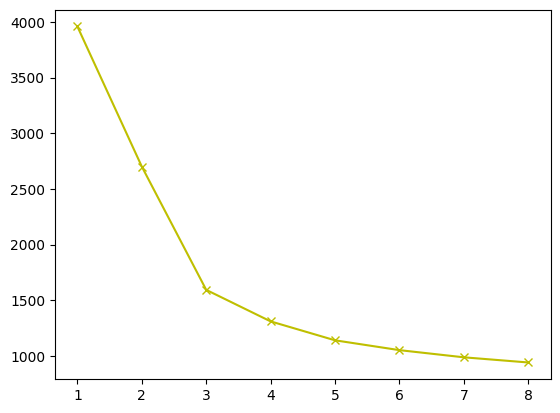

In [29]:
plt.plot(elbow.keys(),elbow.values(),"xy-")

# Silhouette

In [30]:
Silhouette = {}

for k in range(2,10):
    cluster = KMeans(n_clusters = k, random_state = 1)
    cluster.fit(data_scaled)
    labels = cluster.predict(data_scaled)
    Silhouette[k] = silhouette_score(data_scaled, labels)

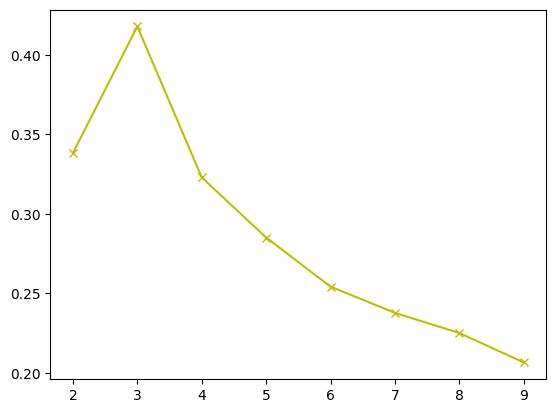

In [32]:
plt.plot(Silhouette.keys(),Silhouette.values(),"xy-")

# From elbow and Silhouette score we get optimum value of k

In [34]:
cluster = KMeans(n_clusters = 3, random_state = 1)
cluster.fit(data_scaled)
labels = cluster.predict(data_scaled)

In [35]:
data_scaled["Lables"] = labels
data["Labels"] = labels

In [36]:
data

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,87073,100000,2,1,1,0,1
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,1
3,40496,30000,5,1,1,4,1
4,47437,100000,6,0,12,3,2
...,...,...,...,...,...,...,...
655,51108,99000,10,1,10,0,2
656,60732,84000,10,1,13,2,2
657,53834,145000,8,1,9,1,2
658,80655,172000,10,1,15,0,2


In [38]:
data["Labels"].value_counts()

1    386
0    224
2     50
Name: Labels, dtype: int64

In [48]:
mean = data.groupby(data.Labels).mean()

In [49]:
median = data.groupby(data.Labels).median()

In [55]:
mean_median = pd.concat([mean,median],axis=0)
mean_median.index = ['0 Mean', '1 Mean', '2 Mean', '0 Median', '1 Median', '2 Median']

In [56]:
mean_median.T

,0 Mean,1 Mean,2 Mean,0 Median,1 Median,2 Median
Customer Key,55239.830357,54881.329016,56708.76,55235.5,52731.0,53875.0
Avg_Credit_Limit,12174.107143,33782.383420,141040.00,12000.0,31000.0,145500.0
Total_Credit_Cards,2.410714,5.515544,8.74,2.0,6.0,9.0
Total_visits_bank,0.933036,3.489637,0.60,1.0,3.0,1.0
Total_visits_online,3.553571,0.981865,10.90,4.0,1.0,11.0
Total_calls_made,6.870536,2.000000,1.08,7.0,2.0,1.0


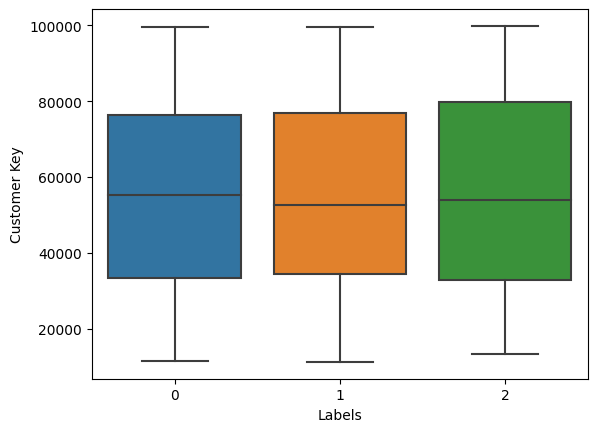

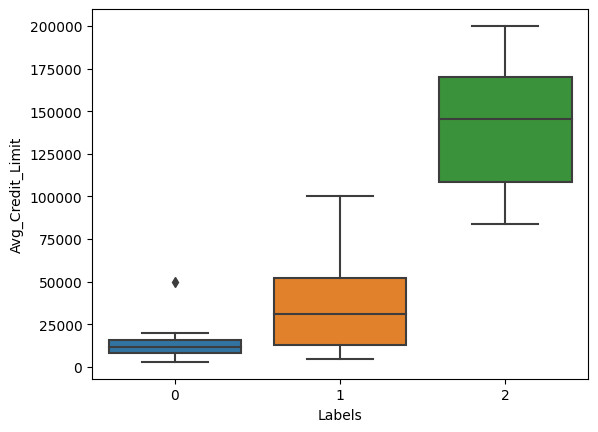

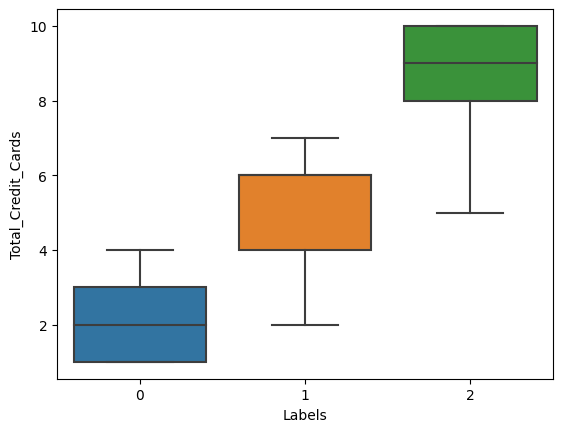

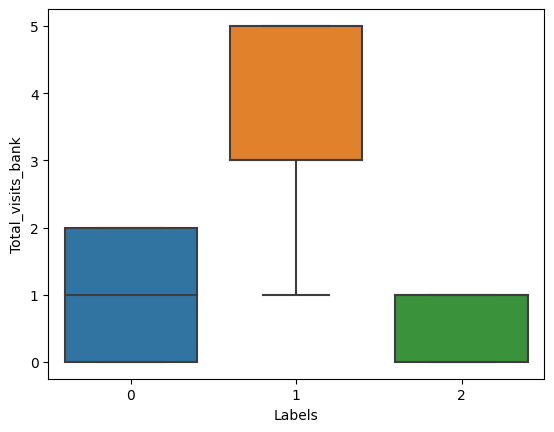

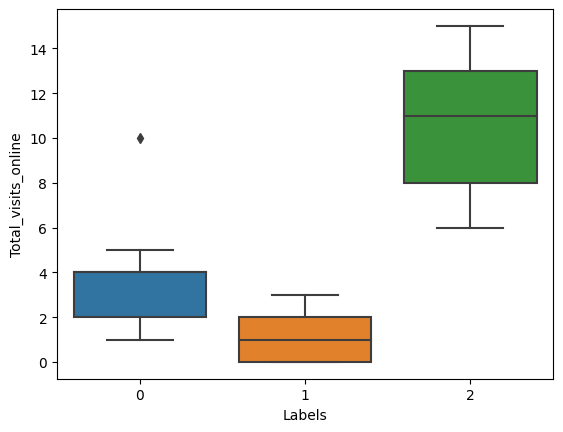

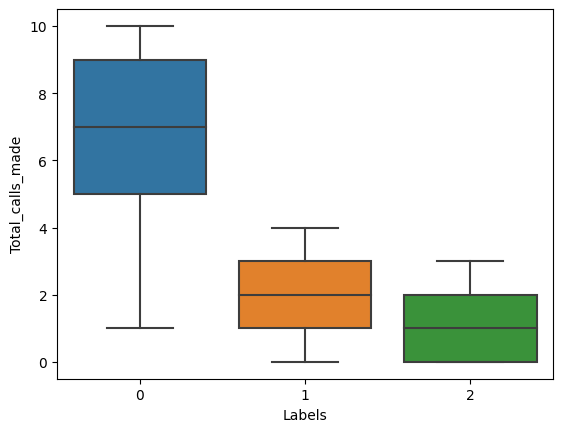

In [58]:
cols_visualise = ['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in cols_visualise:
    sns.boxplot(x = 'Labels', y = col, data = data)
    plt.show()